In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
np.cov(df.values)

array([[2332.514481  , 1450.57684467, 2765.35531183, ..., 1415.706785  ,
        2015.6055345 , 1562.331795  ],
       [1450.57684467,  968.43845011, 1639.51557606, ...,  874.52474667,
        1235.13525683, 1042.91746   ],
       [2765.35531183, 1639.51557606, 3550.41035378, ..., 1857.75953083,
        2488.89479617, 1791.2731825 ],
       ...,
       [1415.706785  ,  874.52474667, 1857.75953083, ..., 2207.195725  ,
        1285.4106075 ,  966.905575  ],
       [2015.6055345 , 1235.13525683, 2488.89479617, ..., 1285.4106075 ,
        1845.486314  , 1322.4333525 ],
       [1562.331795  , 1042.91746   , 1791.2731825 , ...,  966.905575  ,
        1322.4333525 , 1136.377525  ]])

<h4>Тепловая карта</h4>

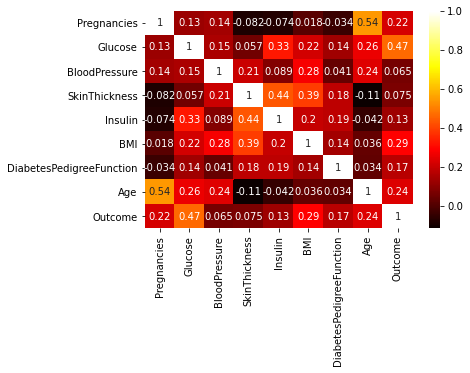

In [362]:
sns.heatmap(df.corr(), cmap = 'hot', annot = True)

In [363]:
# Значение для random_state
RSEED = 50

In [364]:
#sns.pairplot(df, hue = 'Outcome')

In [365]:
data = df.drop(columns = ['Outcome'])
labels = df.pop('Outcome')

In [366]:
# Посмотрим, сколько больных и сколько здоровых
labels.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### Видно, что выборка несбалансированна. Объектов с классом 0 в 2 раза больше, чем объектов с классом 1

In [367]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels,
                                                                    test_size = 0.3, random_state = RSEED)

print(f'train_data: {train_data.shape}')
print(f'train_labels: {train_labels.shape}')
print(f'test_data: {test_data.shape}')
print(f'test_labels: {test_labels.shape}')

train_data: (537, 8)
train_labels: (537,)
test_data: (231, 8)
test_labels: (231,)


### Случайный лес со стандартными параметрами

In [368]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 10, max_features = 'sqrt', n_jobs = -1, random_state = RSEED)
forest.fit(train_data, train_labels)

RandomForestClassifier(max_features='sqrt', n_estimators=10, n_jobs=-1,
                       random_state=50)

In [369]:
# Делаю предсказания для обучающей и тестовой выборки
train_pred = forest.predict(train_data)
test_pred = forest.predict(test_data)

# Вероятности пренадлежности к классу 1
train_proba = forest.predict_proba(train_data)[:, 1]
test_proba = forest.predict_proba(test_data)[:, 1]

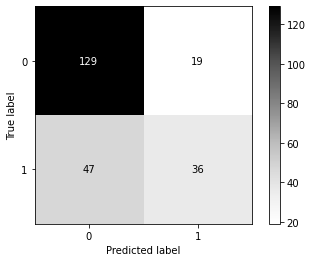

In [370]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score

plot_confusion_matrix(forest, test_data, test_labels, cmap = 'Greys')

In [371]:
print('Precision на обучающей выборке: ', precision_score(train_labels, train_pred))
print('Recall на обучающей выборке: ' , recall_score(train_labels, train_pred))

Precision на обучающей выборке:  1.0
Recall на обучающей выборке:  0.9243243243243243


In [372]:
print('Precision на тестовой выборке: ', precision_score(test_labels, test_pred))
print('Recall на тестовой выборке: ' , recall_score(test_labels, test_pred))

Precision на тестовой выборке:  0.6545454545454545
Recall на тестовой выборке:  0.43373493975903615


In [373]:
fpr, tpr, tresholds = roc_curve(train_labels, train_proba)

AUC на обучающей выборке:  0.998840601965602


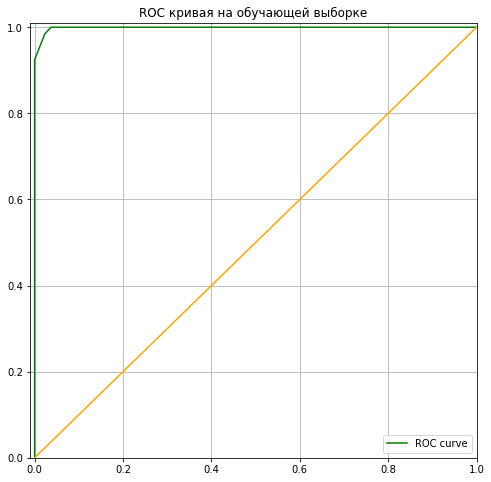

In [374]:
plt.figure(figsize = (8,8))
plt.title('ROC кривая на обучающей выборке')
plt.plot(fpr, tpr, c = 'green', label = 'ROC curve')
plt.plot(tresholds, tresholds, c = 'orange')
plt.legend()
plt.xlim(-0.01,1)
plt.ylim(0,1.01)
plt.grid(True)

print('AUC на обучающей выборке: ', roc_auc_score(train_labels, train_proba))

In [375]:
fpr, tpr, tresholds = roc_curve(test_labels, test_proba)

AUC на тестовой выборке:  0.7808938456528818


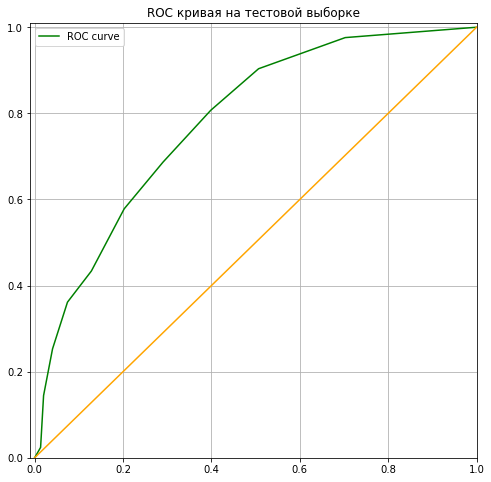

In [376]:
plt.figure(figsize = (8,8))
plt.title('ROC кривая на тестовой выборке')
plt.plot(fpr, tpr, c = 'green', label = 'ROC curve')
plt.plot(tresholds, tresholds, c = 'orange')
plt.legend()
plt.xlim(-0.01,1)
plt.ylim(0,1.01)
plt.grid(True)

print('AUC на тестовой выборке: ', roc_auc_score(test_labels, test_proba))

### Разные параметры для случайного леса. Зависимость результата от них

### 1. Количество деревьев

In [377]:
def quality_tree_count(n_trees):
    model = RandomForestClassifier(n_estimators = n_trees, max_features = 'sqrt', n_jobs = -1, random_state = RSEED)
    model.fit(train_data, train_labels)
    train_pred = model.predict(train_data)
    test_pred = model.predict(test_data)
    train_proba = model.predict_proba(train_data)[:, 1]
    test_proba = model.predict_proba(test_data)[:, 1]
    # Точность и полнота для обучения и теста
    tr_precision = precision_score(train_labels, train_pred)
    tr_recall = recall_score(train_labels, train_pred)
    test_precision = precision_score(test_labels, test_pred)
    test_recall = recall_score(test_labels, test_pred)
    # AUC для теста
    auc = roc_auc_score(test_labels, test_proba)
    
    return tr_precision, test_precision, tr_recall, test_recall, auc

In [378]:
tree_count = [5, 10, 15, 20, 30, 50]
tr_precision = []
test_precision = []
tr_recall = []
test_recall = []
auc = []

for count in tree_count:
    tr_precision.append(quality_tree_count(count)[0])
    test_precision.append(quality_tree_count(count)[1])
    tr_recall.append(quality_tree_count(count)[2])
    test_recall.append(quality_tree_count(count)[3])
    auc.append(quality_tree_count(count)[4])

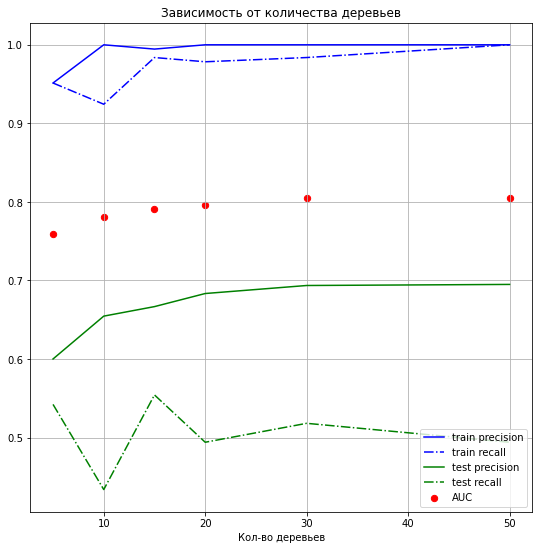

In [379]:
plt.figure(figsize = (9,9))
plt.title('Зависимость от количества деревьев')
plt.xlabel('Кол-во деревьев')
plt.plot(tree_count, tr_precision, c = 'blue', label = 'train precision')
plt.plot(tree_count, tr_recall, c = 'blue' , linestyle = '-.', label = 'train recall')
plt.plot(tree_count, test_precision, c = 'green', label = 'test precision')
plt.plot(tree_count, test_recall, c = 'green' , linestyle = '-.', label = 'test recall')
plt.scatter(tree_count, auc, c = 'red', s = 40, label = 'AUC')
plt.legend(loc = 'lower right')
plt.grid(True)


### Видно, что при кол-ве деревьев больше 15 лес все больше переобучается. В данной задаче recall важнее остальных показателей, поэтому оптимальное кол-во деревьев: 15

### 2. Максимальная глубина

In [380]:
def quality_max_depth(n):
    model = RandomForestClassifier(n_estimators = 15, max_depth = n, max_features = 'sqrt', n_jobs = -1, random_state = RSEED)
    model.fit(train_data, train_labels)
    train_pred = model.predict(train_data)
    test_pred = model.predict(test_data)
    train_proba = model.predict_proba(train_data)[:, 1]
    test_proba = model.predict_proba(test_data)[:, 1]
    # Точность и полнота для обучения и теста
    tr_precision = precision_score(train_labels, train_pred)
    tr_recall = recall_score(train_labels, train_pred)
    test_precision = precision_score(test_labels, test_pred)
    test_recall = recall_score(test_labels, test_pred)
    # AUC для теста
    auc = roc_auc_score(test_labels, test_proba)
    
    return tr_precision, test_precision, tr_recall, test_recall, auc

In [381]:
depth = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]
tr_precision = []
test_precision = []
tr_recall = []
test_recall = []
auc = []

for i in depth:
    tr_precision.append(quality_max_depth(i)[0])
    test_precision.append(quality_max_depth(i)[1])
    tr_recall.append(quality_max_depth(i)[2])
    test_recall.append(quality_max_depth(i)[3])
    auc.append(quality_max_depth(i)[4])

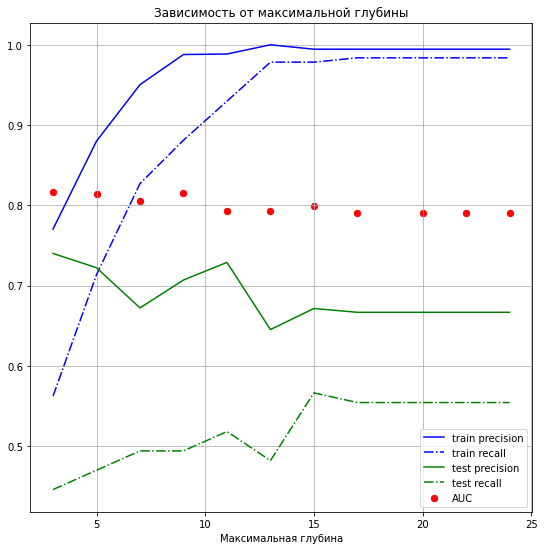

In [382]:
plt.figure(figsize = (9,9))
plt.title('Зависимость от максимальной глубины')
plt.xlabel('Максимальная глубина')
plt.plot(depth, tr_precision, c = 'blue', label = 'train precision')
plt.plot(depth, tr_recall, c = 'blue' , linestyle = '-.', label = 'train recall')
plt.plot(depth, test_precision, c = 'green', label = 'test precision')
plt.plot(depth, test_recall, c = 'green' , linestyle = '-.', label = 'test recall')
plt.scatter(depth, auc, c = 'red', s = 40, label = 'AUC')
plt.legend(loc = 'lower right')
plt.grid(True)

### 3. Минимальное число объектов в листе

In [383]:
def quality_samples_count(n):
    model = RandomForestClassifier(n_estimators = 15, min_samples_leaf = n,
                                       max_features = 'sqrt', n_jobs = -1, random_state = RSEED)
    model.fit(train_data, train_labels)
    train_pred = model.predict(train_data)
    test_pred = model.predict(test_data)
    train_proba = model.predict_proba(train_data)[:, 1]
    test_proba = model.predict_proba(test_data)[:, 1]
    # Точность и полнота для обучения и теста
    tr_precision = precision_score(train_labels, train_pred)
    tr_recall = recall_score(train_labels, train_pred)
    test_precision = precision_score(test_labels, test_pred)
    test_recall = recall_score(test_labels, test_pred)
    # AUC для теста
    auc = roc_auc_score(test_labels, test_proba)
    
    return tr_precision, test_precision, tr_recall, test_recall, auc

In [384]:
samples = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24, 26, 30]
tr_precision = []
test_precision = []
tr_recall = []
test_recall = []
auc = []

for i in samples:
    tr_precision.append(quality_samples_count(i)[0])
    test_precision.append(quality_samples_count(i)[1])
    tr_recall.append(quality_samples_count(i)[2])
    test_recall.append(quality_samples_count(i)[3])
    auc.append(quality_samples_count(i)[4])

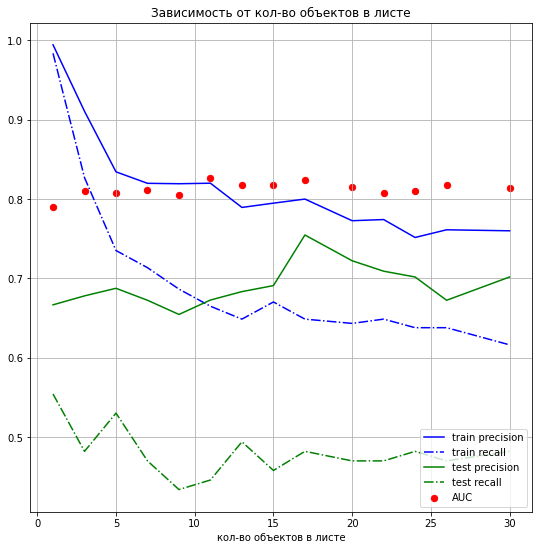

In [385]:
plt.figure(figsize = (9,9))
plt.title('Зависимость от кол-во объектов в листе')
plt.xlabel('кол-во объектов в листе')
plt.plot(samples, tr_precision, c = 'blue', label = 'train precision')
plt.plot(samples, tr_recall, c = 'blue' , linestyle = '-.', label = 'train recall')
plt.plot(samples, test_precision, c = 'green', label = 'test precision')
plt.plot(samples, test_recall, c = 'green' , linestyle = '-.', label = 'test recall')
plt.scatter(samples, auc, c = 'red', s = 40, label = 'AUC')
plt.legend(loc = 'lower right')
plt.grid(True)

### 3. Максимальное кол-во признаков

In [386]:
def quality_max_features(n):
    model = RandomForestClassifier(n_estimators = 15, max_features = n, n_jobs = -1, random_state = RSEED)
    model.fit(train_data, train_labels)
    train_pred = model.predict(train_data)
    test_pred = model.predict(test_data)
    train_proba = model.predict_proba(train_data)[:, 1]
    test_proba = model.predict_proba(test_data)[:, 1]
    # Точность и полнота для обучения и теста
    tr_precision = precision_score(train_labels, train_pred)
    tr_recall = recall_score(train_labels, train_pred)
    test_precision = precision_score(test_labels, test_pred)
    test_recall = recall_score(test_labels, test_pred)
    # AUC для теста
    auc = roc_auc_score(test_labels, test_proba)
    
    return tr_precision, test_precision, tr_recall, test_recall, auc

In [387]:
features = [1, 2, 3, 4, 5, 6]
tr_precision = []
test_precision = []
tr_recall = []
test_recall = []
auc = []

for i in features:
    tr_precision.append(quality_max_features(i)[0])
    test_precision.append(quality_max_features(i)[1])
    tr_recall.append(quality_max_features(i)[2])
    test_recall.append(quality_max_features(i)[3])
    auc.append(quality_max_features(i)[4])

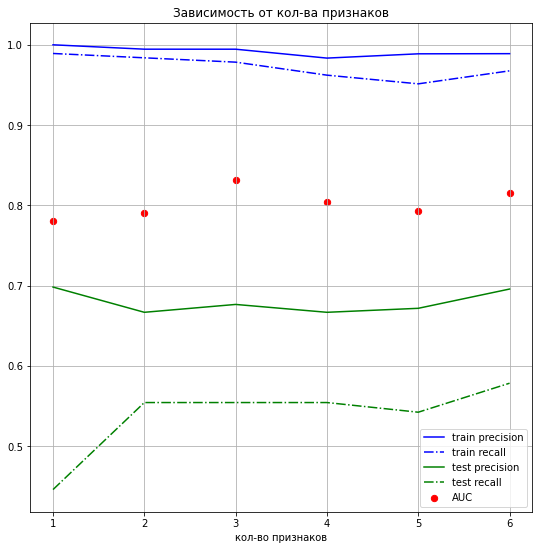

In [388]:
plt.figure(figsize = (9,9))
plt.title('Зависимость от кол-ва признаков')
plt.xlabel('кол-во признаков')
plt.plot(features, tr_precision, c = 'blue', label = 'train precision')
plt.plot(features, tr_recall, c = 'blue' , linestyle = '-.', label = 'train recall')
plt.plot(features, test_precision, c = 'green', label = 'test precision')
plt.plot(features, test_recall, c = 'green' , linestyle = '-.', label = 'test recall')
plt.scatter(features, auc, c = 'red', s = 40, label = 'AUC')
plt.legend(loc = 'lower right')
plt.grid(True)

### Теперь с помощью полного перебора подберем лучший вариант

In [389]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 4, 5, 7, 9, 11, 13, 15, 17, 20, 30],
    'max_features': [2, 3, 5, 6]
}
#metrics_grid = ['precision', 'recall']
rfc = RandomForestClassifier(n_estimators = 100, random_state = RSEED, n_jobs = -1, oob_score = True)

gcv = GridSearchCV(rfc, params, scoring = 'recall',  n_jobs = -1, verbose = 1)
gcv.fit(train_data, train_labels)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:   36.2s finished


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=50),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'max_features': [2, 3, 5, 6],
                         'min_samples_leaf': [1, 4, 5, 7, 9, 11, 13, 15, 17, 20,
                                              30]},
             scoring='recall', verbose=1)

In [390]:
gcv.best_estimator_

RandomForestClassifier(max_depth=5, max_features=6, n_jobs=-1, oob_score=True,
                       random_state=50)

In [391]:
train_pred = gcv.best_estimator_.predict(train_data)
test_pred = gcv.best_estimator_.predict(test_data)

test_proba = gcv.best_estimator_.predict_proba(test_data)[:, 1]

In [392]:
print(precision_score(train_labels, train_pred))
print(recall_score(train_labels, train_pred))
print(precision_score(test_labels, test_pred))
print(recall_score(test_labels, test_pred))

0.8538011695906432
0.7891891891891892
0.6875
0.5301204819277109


In [393]:
print(roc_auc_score(test_labels, test_proba))

0.8231032237056333


### Выявили лучшую модель. построим ее

In [394]:
final_model = RandomForestClassifier(n_estimators = 100, max_depth=15, max_features=3, min_samples_leaf=5,
                                     n_jobs=-1, oob_score=True, random_state=RSEED)
final_model.fit(train_data, train_labels)

RandomForestClassifier(max_depth=15, max_features=3, min_samples_leaf=5,
                       n_jobs=-1, oob_score=True, random_state=50)

In [395]:
train_pred = final_model.predict(train_data)
test_pred = final_model.predict(test_data)

train_proba = final_model.predict_proba(train_data)[:, 1]
test_proba = final_model.predict_proba(test_data)[:, 1]

In [396]:
print(precision_score(train_labels, train_pred))
print(recall_score(train_labels, train_pred))
print(precision_score(test_labels, test_pred))
print(recall_score(test_labels, test_pred))

0.874251497005988
0.7891891891891892
0.6935483870967742
0.5180722891566265


In [397]:
print('AUC = ', roc_auc_score(test_labels, test_proba))

AUC =  0.8200097688049496


In [398]:
from sklearn.metrics import accuracy_score
print('Accuracy = ', accuracy_score(test_labels, test_pred))

Accuracy =  0.7445887445887446


### Что-то странное. best_estimator выдал не самую лучшую модель. Подбор параметров вручную помогает лучше. Попробуем еще подобрать

In [399]:
final_model = RandomForestClassifier(n_estimators = 100, max_depth = 10,
                               max_features = 3, min_samples_leaf = 4, n_jobs = -1, oob_score = True, random_state = RSEED )
final_model.fit(train_data, train_labels)

RandomForestClassifier(max_depth=10, max_features=3, min_samples_leaf=4,
                       n_jobs=-1, oob_score=True, random_state=50)

In [400]:
p_proba = final_model.predict_proba(test_data)[:, 1]
p_pred = final_model.predict(test_data)

In [401]:
roc_auc_score(test_labels, p_proba)

0.8284760664278736

In [402]:
print('Test accuracy = ', accuracy_score(test_labels, p_pred))
print('Test precision = ', precision_score(test_labels, p_pred))
print('Test recall = ', recall_score(test_labels, p_pred))

Test accuracy =  0.7619047619047619
Test precision =  0.7333333333333333
Test recall =  0.5301204819277109


In [403]:
print('OOB score = ', final_model.oob_score_)

OOB score =  0.770949720670391


### параметры, подобранные вручную, дают лучшие результаты на отложенном тесте, чем best_estimator_

<h3>Построили лучшую модель, теперь узнаем какие признаки самые важные</h3>

In [404]:
# Список признаков
features_list = data.columns
features_list

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [405]:
final_model.feature_importances_

array([0.06564575, 0.34994501, 0.064462  , 0.05001585, 0.04982409,
       0.18328709, 0.09709824, 0.13972197])

In [406]:
fi = pd.DataFrame({
    'feature': features_list,
    'importance': final_model.feature_importances_
})
fi = fi.sort_values('importance', ascending = False)

In [407]:
fi

,feature,importance
1,Glucose,0.349945
5,BMI,0.183287
7,Age,0.139722
6,DiabetesPedigreeFunction,0.097098
0,Pregnancies,0.065646
2,BloodPressure,0.064462
3,SkinThickness,0.050016
4,Insulin,0.049824
